<a href="https://colab.research.google.com/github/tacla/Sistemas-Inteligentes/blob/main/Clustering/K_MEANS_An%C3%A1lises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-MEANS: Análises

O objetivo é fazer a análise da qualidade dos agrupamentos gerados. Esta análise depende do número de clusters escolhidos. Para tal, vamos utilizar o método o cotovelo e a análise de silhueta.

Vamos fazer algumas inicializações.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

# Ignorar warnings para não poluir
warnings.filterwarnings("ignore")

# Estilo para as plotagens
meu_estilo = {
    'axes.facecolor': 'white',   # Background color
    'axes.edgecolor': 'black',   # Border color
    'axes.grid': True,           # Show grid
    'grid.color': 'lightgrey',   # Grid color
    'grid.linestyle': '-',       # Grid line style
    'grid.linewidth': 0.5        # Grid line width
}


Agora, montamos o nosso 'dataset'. Claro que aqui é minúsculo, mas recorda-se que é para fins didáticos.

In [ ]:

# Dados da tabela
temp = [35,29,32,18,6,4,0,8,-3,10,9,10,26,20]
umid = [90,78,85,87,60,55,50,89,59,30,40,69,40,70]


dados = list(zip(temp, umid))
print(f"Pares (temperatura, umidade)")
print(f"{dados}")

Pares (temperatura, umidade)
[(35, 90), (29, 78), (32, 85), (18, 87), (6, 60), (4, 55), (0, 50), (8, 89), (-3, 59), (10, 30), (9, 40), (10, 69), (26, 40), (20, 70)]


Vamos rodar o K-Means variando o número de clusters.

In [ ]:
k_range = range(1,11)
sse = []   # somatoria do erro quadratico
dif = []   # diferenças % do SSE a cada aumento do número de clusters
dif.append(0) # inicializa com zero porque o primeiero sse nao tem diferença com o anterior

# variação do número K de clusters
for k in k_range:
  km = KMeans(n_clusters=k, max_iter=20)
  km.fit(dados)
  sse.append(km.inertia_)
  if k > 1:
    dif.append((sse[k-2] - sse[k-1])/sse[k-2])


# Método do Cotovelo
Uma vez que o o KMeans foi executado para clusters com tamanhos variados (de 1 a 10), vamos ver a curva do erro (SSE).

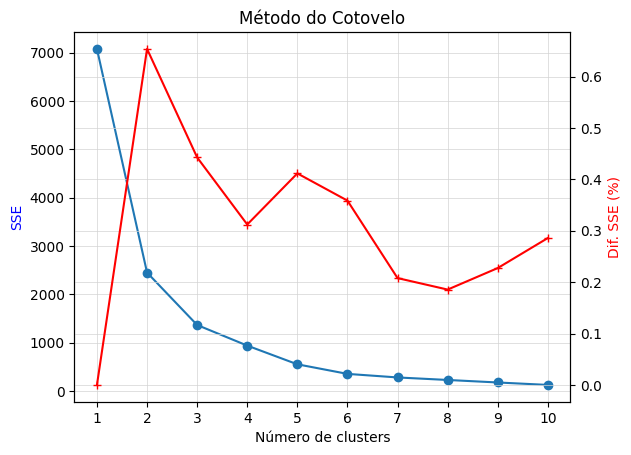

In [ ]:
fig, ax1 = plt.subplots()
plt.style.use(meu_estilo)

# curva 1 - eixo y do lado esquerdo
plt.title('Método do Cotovelo')
ax1.plot(k_range, sse, marker='o')
plt.xticks(k_range)
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('SSE', color='blue')

# curva 2 - eixo y do lado direito
ax2 = ax1.twinx()
ax2.plot(k_range, dif, color='red', marker='+', label='dif. sse%,')
ax2.set_ylabel('Dif. SSE (%)', color='red')

plt.show()

K=4 aparenta fornecer os melhores resulados: é um ponto de inflexão e o ponto seguinte, 5, apresenta um aumento na diferença porcentual do SSE (ver curva vermelha).

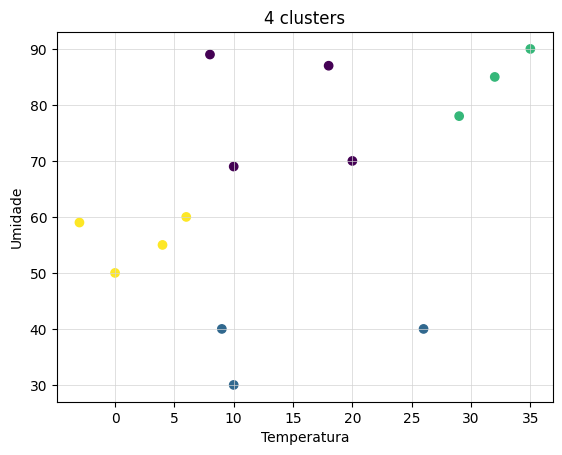

In [ ]:
km = KMeans(n_clusters=4)
clusters = km.fit(dados)
plt.style.use(meu_estilo)
plt.title(f"{clusters.n_clusters} clusters")
plt.scatter(temp, umid, c=km.labels_)
plt.xlabel("Temperatura")
plt.ylabel("Umidade")
plt.show()

# Análise de Silhueta
Vamos verificar se K=4 é realmente o melhor número de clusters. Para fazer a análise de silhueta necessitamos de no mínimo 2 clusters. Portanto, iniciamos com uma mudança no k-range.

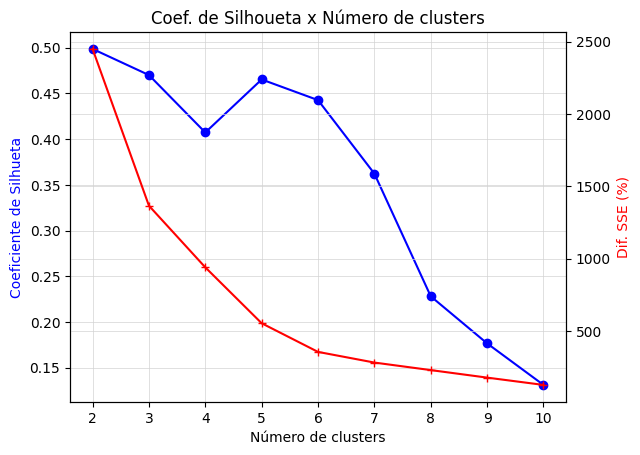

In [ ]:
coefs = []
k_range2 = range(2, 11)

for k in k_range2:
  km = KMeans(n_clusters=k, max_iter=20)
  km.fit(dados)
  score = silhouette_score(dados, km.labels_)
  coefs.append(score)

fig, ax1 = plt.subplots()
# curva 1 - eixo y do lado esquerdo
plt.title("Coef. de Silhoueta x Número de clusters")
ax1.plot(k_range2, coefs, marker='o', color='blue')
plt.xticks(k_range2)
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel("Coeficiente de Silhueta", color="blue")

# curva 2 - eixo y do lado direito
ax2 = ax1.twinx()
ax2.plot(k_range2, sse[1:], color='red', marker='+', label='dif. sse%')
ax2.set_ylabel('SSE', color='red')

plt.show()

Qual a sua conclusão?
k=2 produz um resultado melhor de coesão e de separação, não?

Para k = 2, temos uma média de coeficientes de silhueta = 0.5
Quanto mais próximo de 1, melhor a separação entre clusters e a coesão interna.

Pudemos observar que o método do cotovelo deixa dúvidas e precisamos utilizar outros recursos como o método da Silhueta.

Para se aprofundar na compreensão do método da silhueta, faça o tutorial deste [notebook](https://colab.research.google.com/drive/14GLaL23vsXByytzjzhPw9VMUeXW0Kr7q?usp=sharing)